Inferencing with Bayesian Network in Python
In this demonstration, we’ll use Bayesian Networks to solve the well-known Monty Hall Problem. Let me explain the Monty Hall problem to those of you who are unfamiliar with it:

This problem entails a competition in which a contestant must choose one of three doors, one of which conceals a price. The show’s host (Monty) unlocks an empty door and asks the contestant if he wants to swap to the other door after the contestant has chosen one.

The decision is whether to keep the current door or replace it with a new one. It is preferable to enter by the other door because the price is more likely to be higher. To come out from this ambiguity let’s model this with a Bayesian network.


For this demonstration, we are using a python-based package pgmpy is a Bayesian Networks implementation written entirely in Python with a focus on modularity and flexibility. Structure Learning, Parameter Estimation, Approximate (Sampling-Based) and Exact inference, and Causal Inference are all available as implementations.


In [1]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.7 MB/s eta 0:00:00


Import
from pgmpy.models import BayesianNetwork from pgmpy.factors.discrete import TabularCPD import networkx as nx

In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

The BayesianModel can be initialized by passing a list of edges in the model structure. In this case, there are 4 edges in the model: Guest--> Host, Price-->host

In [3]:
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

# Define the CPDs(Conditional Probability Distribution)


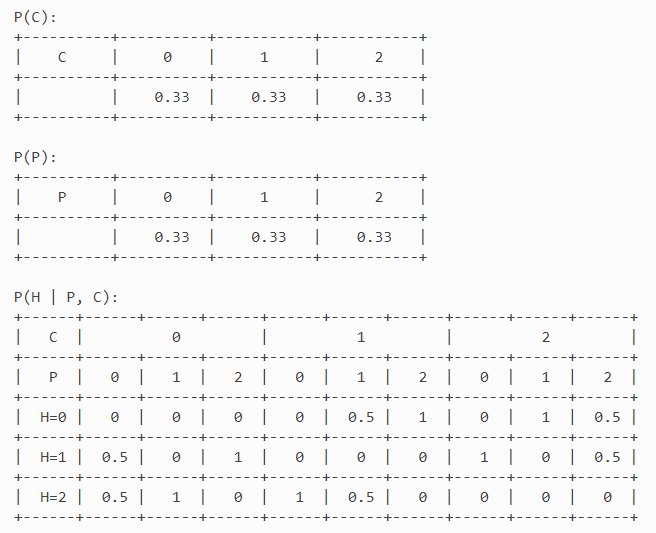

In [4]:
# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])

# Add the CPDs to the model.
After defining the model parameters, we can now add them to the model using add_cpds method. The check_model method can also be used to verify if the CPDs are correctly defined for the model structure.
Now we will check the model structure and associated conditional probability distribution by the argument get_cpds() will return True if every this is fine else through an error msg.

In [5]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [6]:
!pip install pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt
# Defining Bayesian Structure
model = BayesianNetwork([('Burglary', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm', 'JohnCalls'), ('Alarm', 'MaryCalls')])
import networkx as nx
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from IPython.display import Image

# Convert the Bayesian network to a PyDot graph
dot_data = nx.nx_pydot.to_pydot(model)

# Create a graph from the PyDot data
graph = graph_from_dot_data(dot_data.to_string())

# Generate an image from the graph
image = graph.create_png()

# Display the image
Image(image)

# Defining the CPDs:
cpd_burglary = TabularCPD('Burglary', 2, [[0.001], [0.999]])
cpd_earthquake = TabularCPD('Earthquake', 2, [[0.002], [0.998]])

cpd_alarm = TabularCPD('Alarm',2,[[0.95, 0.94, 0.29, 0.001],[0.05, 0.06, 0.71, 0.999]],
                  evidence=['Burglary', 'Earthquake'], evidence_card=[2, 2])

cpd_johncalls = TabularCPD('JohnCalls', 2, [[0.90, 0.05], [0.1, 0.95]],
                  evidence=['Alarm'], evidence_card=[2])

cpd_marycalls = TabularCPD('MaryCalls', 2, [[0.7, 0.01], [0.3, 0.99]],
                  evidence=['Alarm'], evidence_card=[2])
# Associating the CPDs with the network structure.
model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls)

model.check_model()
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['JohnCalls', 'MaryCalls'], evidence={'Burglary': 0, 'Earthquake': 0, 'Alarm':1})
print(posterior_p)



<ipython-input-6-bb9b1c0d31d6>:14: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which has known issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  dot_data = nx.nx_pydot.to_pydot(model)


+--------------+--------------+----------------------------+
| JohnCalls    | MaryCalls    |   phi(JohnCalls,MaryCalls) |
+==============+==============+============================+
| JohnCalls(0) | MaryCalls(0) |                     0.0005 |
+--------------+--------------+----------------------------+
| JohnCalls(0) | MaryCalls(1) |                     0.0495 |
+--------------+--------------+----------------------------+
| JohnCalls(1) | MaryCalls(0) |                     0.0095 |
+--------------+--------------+----------------------------+
| JohnCalls(1) | MaryCalls(1) |                     0.9405 |
+--------------+--------------+----------------------------+
